In [568]:
# This Python 3 environment comes with many helpful analytics libraries installed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [569]:
#Load the data
import opendatasets as op




orders_data = pd.read_csv('C:/Users/Rainb/OneDrive/Documents/IDMP_PROJECT/olist_order_items_dataset.csv')
products_data = pd.read_csv('C:/Users/Rainb/OneDrive/Documents/IDMP_PROJECT/olist_products_dataset.csv')
translations_data = pd.read_csv('C:/Users/Rainb/OneDrive/Documents/IDMP_PROJECT/product_category_name_translation.csv')

In [570]:
orders_data.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [571]:
orders_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [572]:
products_data.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [573]:
products_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [574]:
translations_data.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [575]:
translations_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


### let's translate the product name so that it help in furthers visualization and understanding the relation.
##### for this we will first merge translation and products data. We will merge the data using product_category_name
##### and then we will refer product data and English name to import in orders. We will merge them using product ID.

In [576]:
products_data = products_data.merge(translations_data, on='product_category_name', how="left")
products_data['product_category_name_english'].head()

0         perfumery
1               art
2    sports_leisure
3              baby
4        housewares
Name: product_category_name_english, dtype: object

In [577]:
orders_data = orders_data.merge(products_data[['product_id','product_category_name_english']], on='product_id', how='left')

In [578]:
orders_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 8 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112650 non-null  object 
 1   order_item_id                  112650 non-null  int64  
 2   product_id                     112650 non-null  object 
 3   seller_id                      112650 non-null  object 
 4   shipping_limit_date            112650 non-null  object 
 5   price                          112650 non-null  float64
 6   freight_value                  112650 non-null  float64
 7   product_category_name_english  111023 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 7.7+ MB


In [579]:
orders_data["product_category_name_english"].isnull().sum()/len(orders_data["product_category_name_english"])

0.014442964935641367

In [580]:
#Pre processing
#lets drop the data without any product name.
orders_data.dropna(inplace=True, subset=['product_category_name_english'])

In [581]:
#Lets see the unique values in product list
print("Number of available product ID    : ", orders_data['product_id'].nunique())
print("Number of available category name : ", orders_data['product_category_name_english'].nunique())

Number of available product ID    :  32328
Number of available category name :  71


In [582]:
#EDA
orders_dataf = pd.read_csv('C:/Users/Rainb/OneDrive/Documents/IDMP_PROJECT/olist_orders_dataset.csv/olist_orders_dataset.csv')


In [583]:
orders_dataf.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


### Data Preprocessing

In [584]:
orders_data['product_category_name_english']=orders_data['product_category_name_english'].str.replace('_',' & ')

In [585]:
orders_data.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool & stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet & shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,furniture & decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,garden & tools


In [586]:
import datetime
#orders_dataf['datem'] = datetime.datetime.strptime(orders_dataf['order_purchase_timestamp'], "%Y-%m-%d %H:%M:%S")

orders_dataf['datem']=pd.DatetimeIndex(orders_dataf['order_purchase_timestamp']).month

In [587]:
orders_dataf['datem']

0        10
1         7
2         8
3        11
4         2
         ..
99436     3
99437     2
99438     8
99439     1
99440     3
Name: datem, Length: 99441, dtype: int64

##### Lets review how many and what item list buyer purchased in one order.
##### For this we aggregate category name on order id.

In [588]:
Total_transactionst = pd.DataFrame(orders_data.groupby("order_id").product_category_name_english.unique())
Total_transactionst.head()

,product_category_name_english
order_id,
00010242fe8c5a6d1ba2dd792cb16214,[cool & stuff]
00018f77f2f0320c557190d7a144bdd3,[pet & shop]
000229ec398224ef6ca0657da4fc703e,[furniture & decor]
00024acbcdf0a6daa1e931b038114c75,[perfumery]
00042b26cf59d7ce69dfabb4e55b4fd9,[garden & tools]


In [589]:
# count unique item of categories per transaction.
Total_transactionst['counts_category'] = [len(transaction) for transaction in Total_transactionst['product_category_name_english'] ]
Total_transactionst.head(5)

,product_category_name_english,counts_category
order_id,,
00010242fe8c5a6d1ba2dd792cb16214,[cool & stuff],1
00018f77f2f0320c557190d7a144bdd3,[pet & shop],1
000229ec398224ef6ca0657da4fc703e,[furniture & decor],1
00024acbcdf0a6daa1e931b038114c75,[perfumery],1
00042b26cf59d7ce69dfabb4e55b4fd9,[garden & tools],1


In [590]:
d_data = orders_dataf.merge(Total_transactionst, on='order_id', how="left")
d_data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,datem,product_category_name_english,counts_category
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,10,[housewares],1.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,7,[perfumery],1.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,8,[auto],1.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,11,[pet & shop],1.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2,[stationery],1.0


### Visualisation of transactions count according to Month of Year

C:\Users\Rainb\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


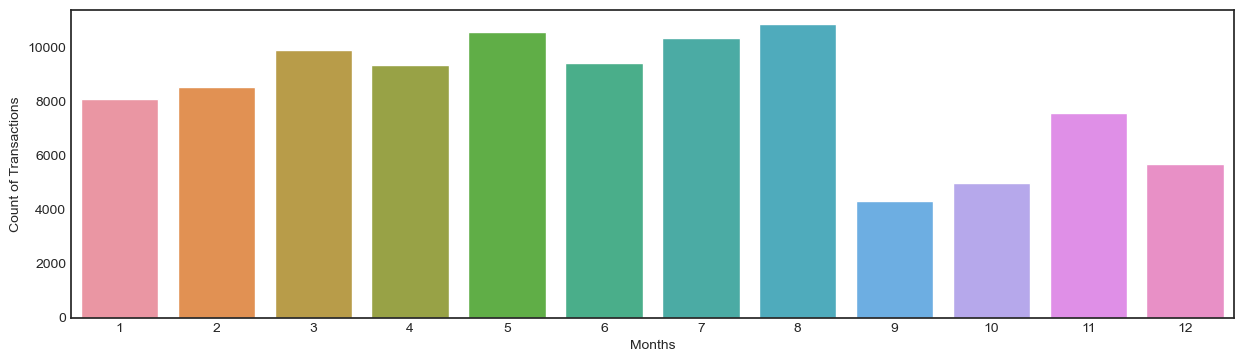

In [591]:
plt.figure(figsize=(15,4))
sns.set_style("dark")
plt.style.use('seaborn-white')
#sns.set_style('darkgrid')
ax=sns.countplot(d_data["datem"])
ax.set(xlabel='Months', ylabel='Count of Transactions')
plt.show()

In [592]:
d_data.loc[(d_data["datem"]==12),'season'] = "Winter"
d_data.loc[(d_data["datem"]>=1) &  (d_data["datem"]<=3),'season'] = "Winter"
d_data.loc[(d_data["datem"]>3) &  (d_data["datem"]<=6),'season'] = "Spring"
d_data.loc[(d_data["datem"]>6) &  (d_data["datem"]<=9),'season'] = "Summer"
d_data.loc[(d_data["datem"]>9) &  (d_data["datem"]<=11),'season'] = "Fall"

### Visualisation of transactions count according to SEASON

C:\Users\Rainb\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


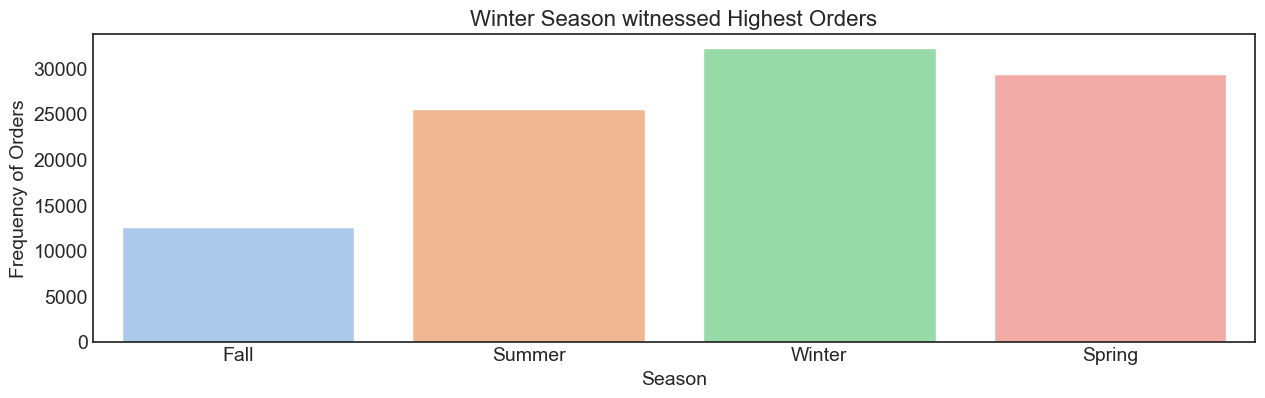

In [593]:
plt.figure(figsize=(15,4))
sns.set_style("dark")
#countplt, ax = plt.subplots(figsize = (10,7))
plt.style.use('seaborn-white')
color = plt.cm.copper(np.linspace(0, 1, 40))
#sns.set_style('darkgrid')
ax=sns.countplot(d_data["season"],palette = "pastel")
ax.set_xlabel('Season',fontsize=14)
ax.set_ylabel('Frequency of Orders',fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_title('Winter Season witnessed Highest Orders', fontsize = 16)
#ax.set(xlabel='Season', ylabel='Count of Transactions')
plt.show()

### Distribution of product category sold in winter season

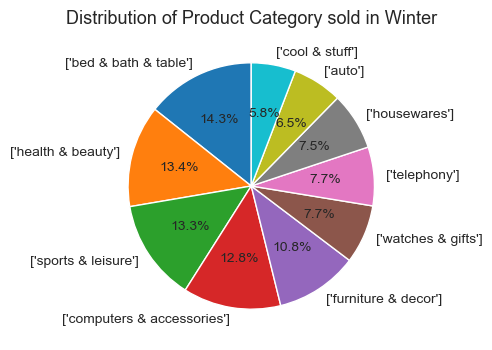

In [594]:
import warnings
sns.set_style("dark")
plt.style.use('seaborn-white')
#
#sns.set_style('darkgrid')
warnings.filterwarnings(action='ignore', category=DeprecationWarning) # setting ignore as a parameter and further adding category
plt.figure(figsize=(17,4))
values = d_data.product_category_name_english.loc[(d_data['season']== "Winter")].value_counts()[:10]
labels = d_data.product_category_name_english.loc[(d_data['season']== "Winter")].value_counts().index[:10]

plt.pie(values, autopct='%1.1f%%', labels = labels, startangle=90)
plt.title('Distribution of Product Category sold in Winter', fontsize = 13)
plt.grid()
plt.show()

In [595]:
d_data["date"] = pd.to_datetime(d_data['order_purchase_timestamp'])
d_data["dayname"] = d_data["date"].dt.day_name()

### Visualisation of transactions count according to day of week

C:\Users\Rainb\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


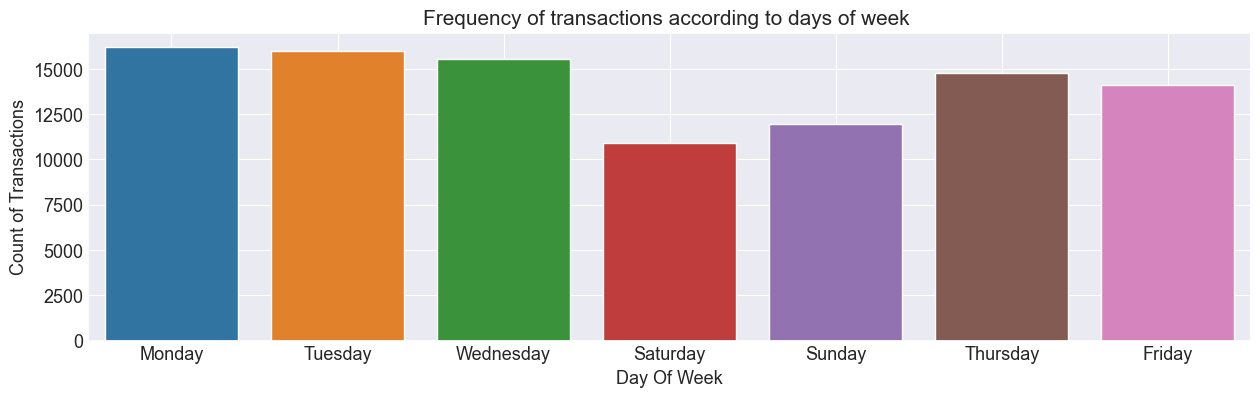

In [596]:
#plt.style.use('seaborn-white')
sns.set_style("dark")
plt.figure(figsize=(15,4))
ax=sns.countplot(d_data["dayname"])
ax.tick_params(axis='both', which='major', labelsize=13)
ax.set_xlabel('Day Of Week',fontsize=13)
ax.set_ylabel('Count of Transactions',fontsize=13)
ax.set_title('Frequency of transactions according to days of week ', fontsize = 15)
plt.grid()
plt.show()

In [597]:
Total_transactions = orders_data.groupby("order_id").product_category_name_english.unique()
Total_transactions.head()

order_id
00010242fe8c5a6d1ba2dd792cb16214         [cool & stuff]
00018f77f2f0320c557190d7a144bdd3           [pet & shop]
000229ec398224ef6ca0657da4fc703e    [furniture & decor]
00024acbcdf0a6daa1e931b038114c75            [perfumery]
00042b26cf59d7ce69dfabb4e55b4fd9       [garden & tools]
Name: product_category_name_english, dtype: object

In [598]:
Total_transactions

order_id
00010242fe8c5a6d1ba2dd792cb16214               [cool & stuff]
00018f77f2f0320c557190d7a144bdd3                 [pet & shop]
000229ec398224ef6ca0657da4fc703e          [furniture & decor]
00024acbcdf0a6daa1e931b038114c75                  [perfumery]
00042b26cf59d7ce69dfabb4e55b4fd9             [garden & tools]
                                              ...            
fffc94f6ce00a00581880bf54a75a037                 [housewares]
fffcd46ef2263f404302a634eb57f7eb    [computers & accessories]
fffce4705a9662cd70adb13d4a31832d           [sports & leisure]
fffe18544ffabc95dfada21779c9644f    [computers & accessories]
fffe41c64501cc87c801fd61db3f6244         [bed & bath & table]
Name: product_category_name_english, Length: 97256, dtype: object

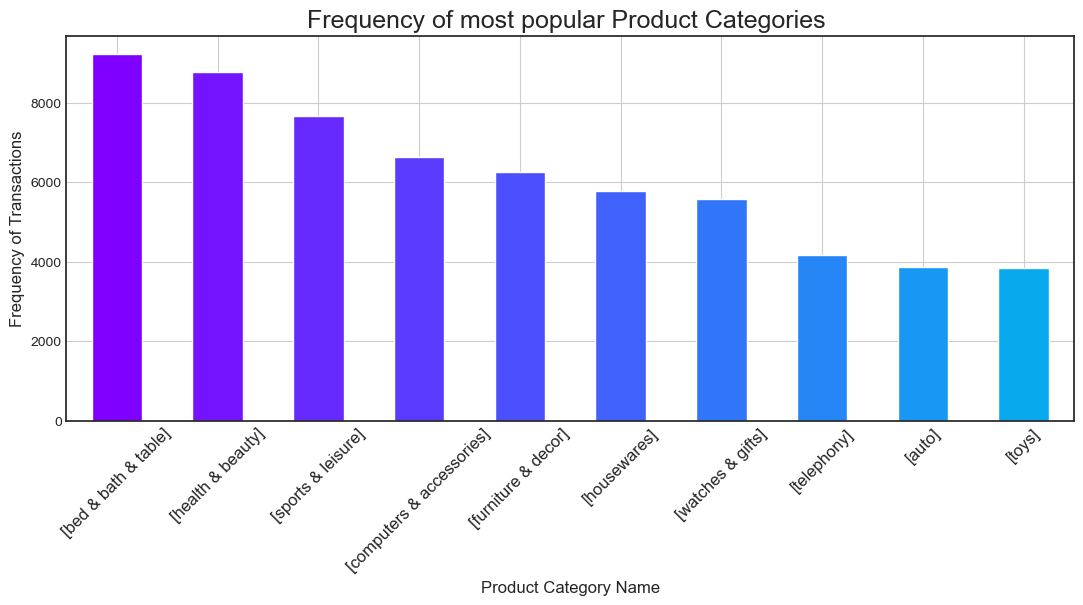

In [599]:
# Lets see top 10 most purchased categories
plt.style.use('seaborn-white')
color = plt.cm.rainbow(np.linspace(0, 1, 40))
#color = plt.cm.copper(np.linspace(0, 1, 40))
Total_transactions.value_counts().head(10).plot.bar(color = color, figsize=(13,5))
plt.title('Frequency of most popular Product Categories ', fontsize = 18)
plt.xticks(rotation = 45,fontsize=12)
plt.xticks(fontsize=12)
plt.xlabel('Product Category Name',fontsize=12)
plt.ylabel('Frequency of Transactions',fontsize=12)
plt.grid()
plt.show()


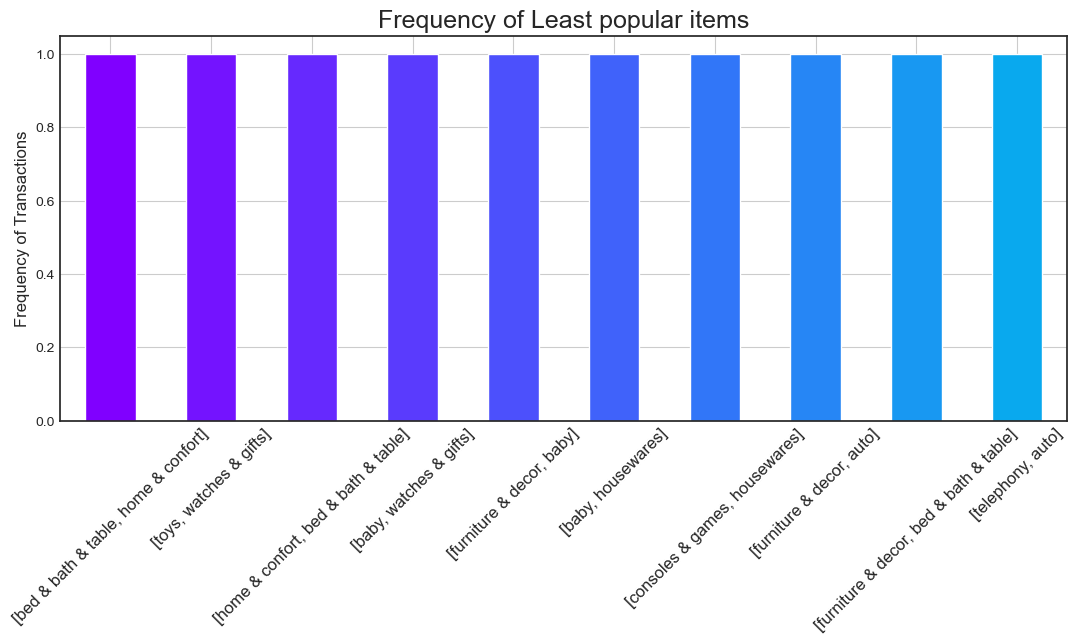

In [600]:
#Bottom 10 purchased categories
plt.style.use('seaborn-white')
# Lets see bottom 10 most purchased categories

color = plt.cm.rainbow(np.linspace(0, 1, 40))
Total_transactions.value_counts().tail(10).plot.bar(color = color, figsize=(13,5))
plt.title('Frequency of Least popular items', fontsize = 18)
plt.ylabel('Frequency of Transactions',fontsize=12)
plt.xticks(rotation = 45,fontsize=12 )
plt.grid()
plt.show()



#### 1. most of the item List consist of 1 item
#### 2. There are long tail of item list that purchased infrequently.

## Lets find out some statistics and range of item number in transactions.

In [601]:
Total_transactions_list = Total_transactions.tolist()
Total_transactions_list

[array(['cool & stuff'], dtype=object),
 array(['pet & shop'], dtype=object),
 array(['furniture & decor'], dtype=object),
 array(['perfumery'], dtype=object),
 array(['garden & tools'], dtype=object),
 array(['housewares'], dtype=object),
 array(['telephony'], dtype=object),
 array(['garden & tools'], dtype=object),
 array(['health & beauty'], dtype=object),
 array(['books & technical'], dtype=object),
 array(['health & beauty'], dtype=object),
 array(['fashion & bags & accessories'], dtype=object),
 array(['bed & bath & table'], dtype=object),
 array(['garden & tools'], dtype=object),
 array(['sports & leisure'], dtype=object),
 array(['consoles & games'], dtype=object),
 array(['perfumery'], dtype=object),
 array(['sports & leisure'], dtype=object),
 array(['cool & stuff'], dtype=object),
 array(['bed & bath & table'], dtype=object),
 array(['telephony'], dtype=object),
 array(['office & furniture'], dtype=object),
 array(['fashion & bags & accessories'], dtype=object),
 array(['coo

In [602]:
# number of trasactions
len(Total_transactions_list)

97256

In [603]:
# Lets count unique item of categories per transaction.
counts_category = [len(transaction) for transaction in Total_transactions_list]
counts_category 

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [604]:
#Median item list 
np.median(counts_category)

1.0

In [605]:
np.max(counts_category)

3

# Association Rules and Metrics

### Association Rules is like if else condition. if bread sold, butter has high chances to sell.
### and Metrics is the strength of this association.
* **rule:** if *{bread)* then *{butter}*
  * **support:** 0.10     --- it measures the frequency, an itemset appears in a database of transactions.
  * **leverage:** 0.03

We will first create a data with row for each transaction and which category sold on that transaction or not. This is similar to OneHot encoding and then we will use it in different mlxtend functions.

In [606]:
d_data.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,datem,product_category_name_english,counts_category,season,date,dayname
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,10,[housewares],1.0,Fall,2017-10-02 10:56:33,Monday
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,7,[perfumery],1.0,Summer,2018-07-24 20:41:37,Tuesday
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,8,[auto],1.0,Summer,2018-08-08 08:38:49,Wednesday
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,11,[pet & shop],1.0,Fall,2017-11-18 19:28:06,Saturday
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2,[stationery],1.0,Winter,2018-02-13 21:18:39,Tuesday


In [607]:
d_data1 = orders_data.merge(d_data, on='order_id', how="left")
d_data1.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name_english_x,customer_id,order_status,...,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,datem,product_category_name_english_y,counts_category,season,date,dayname
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool & stuff,3ce436f183e68e07877b285a838db11a,delivered,...,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,9,[cool & stuff],1.0,Summer,2017-09-13 08:59:02,Wednesday
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet & shop,f6dd3ec061db4e3987629fe6b26e5cce,delivered,...,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00,4,[pet & shop],1.0,Spring,2017-04-26 10:53:06,Wednesday
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,furniture & decor,6489ae5e4333f3693df5ad4372dab6d3,delivered,...,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00,1,[furniture & decor],1.0,Winter,2018-01-14 14:33:31,Sunday
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumery,d4eb9395c8c0431ee92fce09860c5a06,delivered,...,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00,8,[perfumery],1.0,Summer,2018-08-08 10:00:35,Wednesday
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,garden & tools,58dbd0b2d70206bf40e62cd34e84d795,delivered,...,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00,2,[garden & tools],1.0,Winter,2017-02-04 13:57:51,Saturday


In [608]:
Total_transactionst = d_data1.groupby("order_id").product_category_name_english_x.unique()
Total_transactionst.head()

order_id
00010242fe8c5a6d1ba2dd792cb16214         [cool & stuff]
00018f77f2f0320c557190d7a144bdd3           [pet & shop]
000229ec398224ef6ca0657da4fc703e    [furniture & decor]
00024acbcdf0a6daa1e931b038114c75            [perfumery]
00042b26cf59d7ce69dfabb4e55b4fd9       [garden & tools]
Name: product_category_name_english_x, dtype: object

### Lets view Apriori Algorithm results season wise. 

### Lets see which products are likely to be purchased  together in winter season

In [609]:
overall = d_data1
fall = d_data1[d_data1["season"]=="Fall"]
winter = d_data1[d_data1["season"]=="Winter"]
spring = d_data1[d_data1["season"]=="Spring"]

In [610]:
Total_transactionstw = winter.groupby("order_id").product_category_name_english_x.unique()
Total_transactionstw.head()

order_id
000229ec398224ef6ca0657da4fc703e    [furniture & decor]
00042b26cf59d7ce69dfabb4e55b4fd9       [garden & tools]
00054e8431b9d7675808bcb819fb4a32            [telephony]
0005a1a1728c9d785b8e2b08b904576c      [health & beauty]
00061f2a7bc09da83e415a52dc8a4af1      [health & beauty]
Name: product_category_name_english_x, dtype: object

In [611]:
Total_transactionstw = Total_transactionstw.tolist()
Total_transactionstw

[array(['furniture & decor'], dtype=object),
 array(['garden & tools'], dtype=object),
 array(['telephony'], dtype=object),
 array(['health & beauty'], dtype=object),
 array(['health & beauty'], dtype=object),
 array(['garden & tools'], dtype=object),
 array(['cool & stuff'], dtype=object),
 array(['bed & bath & table'], dtype=object),
 array(['office & furniture'], dtype=object),
 array(['fashion & bags & accessories'], dtype=object),
 array(['luggage & accessories'], dtype=object),
 array(['furniture & decor'], dtype=object),
 array(['furniture & decor'], dtype=object),
 array(['electronics'], dtype=object),
 array(['bed & bath & table'], dtype=object),
 array(['cool & stuff'], dtype=object),
 array(['furniture & decor'], dtype=object),
 array(['electronics'], dtype=object),
 array(['computers & accessories'], dtype=object),
 array(['bed & bath & table'], dtype=object),
 array(['computers & accessories'], dtype=object),
 array(['sports & leisure'], dtype=object),
 array(['books & tec

In [478]:
!pip install mlxtend

In [612]:
from mlxtend.preprocessing import TransactionEncoder

# encode the data
encoder = TransactionEncoder()
Category_column_datas = encoder.fit_transform(Total_transactionstw)

# Convert array to pandas DataFrame.
Category_column_datas = pd.DataFrame(Category_column_datas, columns = encoder.columns_)
Category_column_datas.head()

,agro & industry & and & commerce,air & conditioning,art,audio,auto,baby,bed & bath & table,books & general & interest,books & imported,books & technical,...,security & and & services,signaling & and & security,small & appliances,small & appliances & home & oven & and & coffee,sports & leisure,stationery,tablets & printing & image,telephony,toys,watches & gifts
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [613]:
from mlxtend.frequent_patterns import apriori

# Apply apriori algorithm to data 
# with min support threshold of 0.01.
frequent_item_sets = apriori(Category_column_datas, use_colnames = True, min_support = 0.00005, max_len = 2)
frequent_item_sets

,support,itemsets
0,0.002594,(agro & industry & and & commerce)
1,0.002914,(air & conditioning)
2,0.001473,(art)
3,0.003458,(audio)
4,0.041563,(auto)
...,...,...
91,0.000160,"(perfumery, health & beauty)"
92,0.000096,"(sports & leisure, health & beauty)"
93,0.000064,"(market & place, housewares)"
94,0.000064,"(housewares, stationery)"


In [614]:
from mlxtend.frequent_patterns import association_rules

associationRule = association_rules(frequent_item_sets, metric = 'support', min_threshold = 0.0001)

# Print rules header.
associationRule.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(bed & bath & table),(baby),0.092315,0.027057,0.000192,0.002081,0.076917,-0.002306,0.974972
1,(baby),(bed & bath & table),0.027057,0.092315,0.000192,0.007101,0.076917,-0.002306,0.914176
2,(cool & stuff),(baby),0.037464,0.027057,0.000192,0.005128,0.189531,-0.000822,0.977958
3,(baby),(cool & stuff),0.027057,0.037464,0.000192,0.007101,0.189531,-0.000822,0.969419
4,(baby),(furniture & decor),0.027057,0.070445,0.000128,0.004734,0.067197,-0.001778,0.933976


In [615]:
associationRulew = association_rules(frequent_item_sets, metric = 'confidence', min_threshold = 0.01)
associationRulew

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(art),(furniture & decor),0.001473,0.070445,0.000064,0.043478,0.617194,-0.000040,0.971807
1,(audio),(watches & gifts),0.003458,0.049248,0.000064,0.018519,0.376029,-0.000106,0.968691
2,(home & confort),(bed & bath & table),0.002818,0.092315,0.000320,0.113636,1.230962,0.000060,1.024055
3,(market & place),(bed & bath & table),0.003298,0.092315,0.000064,0.019417,0.210339,-0.000240,0.925659
4,(books & general & interest),(market & place),0.005508,0.003298,0.000064,0.011628,3.525627,0.000046,1.008428
5,(market & place),(books & general & interest),0.003298,0.005508,0.000064,0.019417,3.525627,0.000046,1.014185
6,(construction & tools & construction),(garden & tools),0.005636,0.035575,0.000096,0.017045,0.479145,-0.000104,0.981149
7,(construction & tools & lights),(sports & leisure),0.000929,0.085014,0.000096,0.103448,1.216832,0.000017,1.020561
8,(fashion & childrens & clothes),(fashion & bags & accessories),0.000064,0.019244,0.000064,1.000000,51.963394,0.000063,inf
9,(home & construction),(furniture & decor),0.004227,0.070445,0.000096,0.022727,0.322624,-0.000202,0.951172


In [616]:
c=associationRulew.sort_values(by="lift",ascending=False)

In [617]:
c=c[c['leverage']>0.0]

In [618]:
c

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
8,(fashion & childrens & clothes),(fashion & bags & accessories),0.000064,0.019244,0.000064,1.000000,51.963394,0.000063,inf
5,(market & place),(books & general & interest),0.003298,0.005508,0.000064,0.019417,3.525627,0.000046,1.014185
4,(books & general & interest),(market & place),0.005508,0.003298,0.000064,0.011628,3.525627,0.000046,1.008428
2,(home & confort),(bed & bath & table),0.002818,0.092315,0.000320,0.113636,1.230962,0.000060,1.024055
7,(construction & tools & lights),(sports & leisure),0.000929,0.085014,0.000096,0.103448,1.216832,0.000017,1.020561


In [619]:
associationRulew=associationRulew[associationRulew['leverage']>0.0]

In [620]:
associationRulew

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(home & confort),(bed & bath & table),0.002818,0.092315,0.000320,0.113636,1.230962,0.000060,1.024055
4,(books & general & interest),(market & place),0.005508,0.003298,0.000064,0.011628,3.525627,0.000046,1.008428
5,(market & place),(books & general & interest),0.003298,0.005508,0.000064,0.019417,3.525627,0.000046,1.014185
7,(construction & tools & lights),(sports & leisure),0.000929,0.085014,0.000096,0.103448,1.216832,0.000017,1.020561
8,(fashion & childrens & clothes),(fashion & bags & accessories),0.000064,0.019244,0.000064,1.000000,51.963394,0.000063,inf


### Visualising heatmaps using Lift

In [623]:
# Generate a heatmap with annotations on and the colorbar 

c['antecedents'] = c['antecedents'].apply(lambda a: ','.join(list(a)))
c['consequents'] = c['consequents'].apply(lambda a: ','.join(list(a)))



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


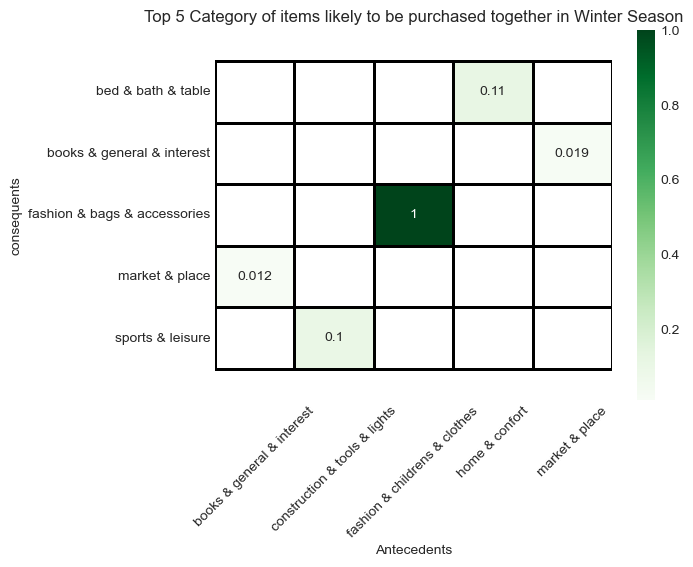

In [625]:
# Transform antecedent, consequent, and support columns into matrix
support_table = c.pivot(index='consequents', columns='antecedents', values='confidence')
sns.set_style("dark")
plt.style.use('seaborn-white')
u=sns.heatmap(support_table,fmt='.2g',annot=True,cmap = "Greens",
                  linewidths = 1,
                  linecolor = "black")

b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
#xticks(np.arange(5), ('Tom', 'Dick', 'Harry', 'Sally', 'Sue')
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.xlabel('Antecedents',fontsize=10)
plt.ylabel('consequents',fontsize=10)
plt.title('Top 5 Category of items likely to be purchased together in Winter Season')
plt.legend()
plt.show() 


In [626]:
associationRule5=associationRulew[associationRulew['confidence']>0.8]
associationRule5

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
8,(fashion & childrens & clothes),(fashion & bags & accessories),0.000064,0.019244,0.000064,1.0,51.963394,0.000063,inf


### First of all, it can be said that (fashion & childrens & clothes) -> (fashion & bags & accessories)	 will be more likely to be purchased together in winter season